In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def div_conq(lpontos):
    lpontos=list(np.array(lpontos))
    lpontos.sort(key=lambda x:x[0])
    l=[[v,lpontos[2*i+1]] for i,v in enumerate(lpontos[:-1:2])]
    if len(lpontos)%2==1:    
        l[-1].append(lpontos[-1])
    while len(l)>1:
        l=[conquer(v,l[2*i+1]) for i,v in enumerate(l[:-1:2])]
    l[0].append(l[0][0]) # para plotar o casco com a última aresta
    return np.array(l).T

def conquer(l1,l2):
    lha=[]
    for i,l in enumerate([l1,l2]):        
        if np.cross(l[-1]-l[0],l[1]-l[0])<0: #se l for antihor
            l=l[::-1] # vira horário
        
        lc=l.copy()
        d={tuple(v):i for i,v in enumerate(lc)}
        
        lc.sort(key=lambda x:x[0])
        a=lc[-1]
        if i==1: a = lc[0]
        
        di=d[tuple(a)]
        lh=l[di:]+l[:di]
        l=l[::-1]
        n=len(l)
        di=n-1-di
        la=l[di:]+l[:di]
        lha.append([lh,la])
    
    l2=lha[1][1]
    l1=lha[0][0]
    i=0
    
    lc=l1.copy()
    lc.sort(key=lambda x:x[0])
    a=lc[-1]
    
    yind=tang(a,l2)
    xind=tang2(l2[yind],l1)
    x=l1[xind]
    y=l2[yind]
    while np.all(x!=a):
        a=x
        yind=tang(a,l2)
        y=l2[yind]
        xind=tang2(y,l1)
        x=l1[xind]
    low=[xind,yind] # para l2 antihorário
    
    # Tangente de cima
    l1=lha[0][1]
    l2=lha[1][0]
    
    lc=l1.copy()
    lc.sort(key=lambda x:x[0])
    a=lc[-1]
    
    yind=tang2(a,l2)
    xind=tang(l2[yind],l1)
    x=l1[xind]
    y=l2[yind]
    while np.all(x!=a):
        a=x
        yind=tang2(a,l2)
        y=l2[yind]
        xind=tang(y,l1)
        x=l1[xind]
    high=[xind,yind] # para l1antihor e l2 hor
    
    l1=lha[0][0] # para q l1 e l2 nao estejam invs
    l2=lha[1][0]
    
    high0=len(l1)-high[0] # para l1 horário
    low1=len(l2)-low[1] # para l2 horário
    
    c1=l1[low[0]:high0+1]
    if high[0]==0: c1.append(l1[0]) # se terminar com 0,adicionar o termo
    c2=l2[high[1]:low1+1]
    if low[1]==0: c2.append(l2[0]) # se terminar com 0,adicionar o termo    
    l=c1+c2
    return l

def tang(p,l):
    iposits=[]
    i=0
    ponto=l[i]
    linha=l[1]-ponto
    linp=p-ponto
    vet=np.cross(linp,linha)
    while vet>0:
        i+=1
        ponto=l[i]
        if i <len(l)-1: prox=l[i+1]
        else: prox = l[0]
        linha=prox-ponto
        linp=p-ponto
        vet=np.cross(linp,linha)
    return i
def tang2(p,l):
    iposits=[]
    i=0
    ponto=l[i]
    linha=l[1]-ponto
    linp=p-ponto
    vet=np.cross(linp,linha)
    while vet<0:
        i+=1
        ponto=l[i]
        if i <len(l)-1: prox=l[i+1]
        else: prox = l[0]
        linha=prox-ponto
        linp=p-ponto
        vet=np.cross(linp,linha)
    return i

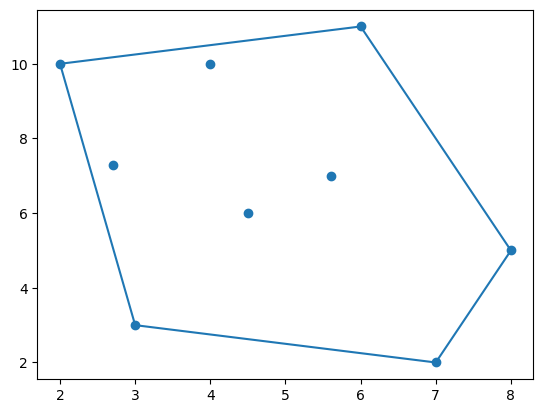

In [16]:
lpontos=[[2,10],[3,3],[4.5,6],[2.7,7.3],[5.6,7],[6,11],
         [7,2],[8,5],[4,10]]
apontos=np.array(lpontos).T
plt.scatter(apontos[0],apontos[1])
c=div_conq(lpontos)
plt.plot(c[0],c[1])